In [2]:
import numpy as np
import pandas as pd 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

1258


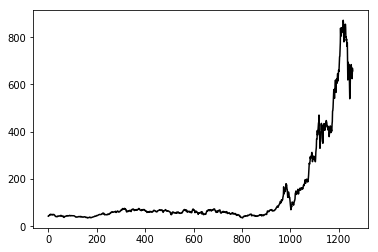

In [47]:
TSLA_data = pd.read_csv("TSLA_6M_Data/TSLA.csv")

Time = np.array(TSLA_data.Date).reshape(-1,1)
Open = np.array(TSLA_data.Open).reshape(-1,1)
High = np.array(TSLA_data.High).reshape(-1,1)
Low = np.array(TSLA_data.Low).reshape(-1,1)
Close = np.array(TSLA_data.Low).reshape(-1,1)

m = len(Close)
print(m)

plt.plot(range(m), Close, '-', color='black')
plt.show()

In [50]:
training_set = Close[0:m-30]
test_set = Close[m-30:]

In [51]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

In [52]:
X_train = np.zeros((1228,40))
Y_train = np.zeros((1228,1))

for i in range(m-70):

    X_train[i] = scaled_training_set[i:40+i,0]
    Y_train[i] = scaled_training_set[40+i,0]
    

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [53]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=1))

#RMSProp is working fine with LSTM but so do ADAM optimizer
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
1228/1228 [==============================] - 4s 4ms/step - loss: 0.0071
Epoch 2/100
1228/1228 [==============================] - 3s 2ms/step - loss: 0.0017
Epoch 3/100
1228/1228 [==============================] - 3s 2ms/step - loss: 0.0017
Epoch 4/100
1228/1228 [==============================] - 2s 2ms/step - loss: 0.0017
Epoch 5/100
1228/1228 [==============================] - 3s 2ms/step - loss: 0.0014
Epoch 6/100
1228/1228 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 7/100
1228/1228 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 8/100
1228/1228 [==============================] - 3s 2ms/step - loss: 0.0016
Epoch 9/100
1228/1228 [==============================] - 3s 2ms/step - loss: 0.0013
Epoch 10/100
1228/1228 [==============================] - 3s 2ms/step - loss: 0.0013
Epoch 11/100
1228/1228 [==============================] - 3s 2ms/step - loss: 0.0011
Epoch 12/100
1228/1228 [==============================] - 3s 2ms/step - lo

1228/1228 [==============================] - 3s 2ms/step - loss: 7.3032e-04
Epoch 95/100
1228/1228 [==============================] - 3s 2ms/step - loss: 7.3847e-04
Epoch 96/100
1228/1228 [==============================] - 3s 2ms/step - loss: 9.6445e-04
Epoch 97/100
1228/1228 [==============================] - 2s 2ms/step - loss: 7.8129e-04
Epoch 98/100
1228/1228 [==============================] - 3s 2ms/step - loss: 0.0010
Epoch 99/100
1228/1228 [==============================] - 3s 2ms/step - loss: 0.0011
Epoch 100/100
1228/1228 [==============================] - 3s 2ms/step - loss: 8.3996e-04


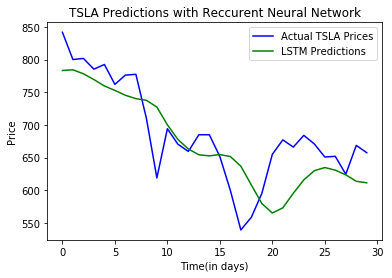

In [54]:
#------------ TESTING THE ALGORITHM ----------------
#training set plus testset
dataset_total = Close
#all inputs for test set
inputs = dataset_total[len(dataset_total)-len(test_set)-40:]
inputs = inputs.reshape(-1,1)

#neural net trained on the scaled values we have to min-max normalize the inputs
#it is already fitted so we can use transform directly
inputs = scaler.transform(inputs)      

X_test = []

for i in range(40,len(test_set)+40):
    X_test.append(inputs[i-40:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

predictions = model.predict(X_test)

#inverse the predicitons because we applied normalization but we want to compare with the original prices
predictions = scaler.inverse_transform(predictions)

#plotting the results
plt.plot(test_set, color='blue', label='Actual TSLA Prices')
plt.plot(predictions, color='green', label='LSTM Predictions')
plt.title('TSLA Predictions with Reccurent Neural Network')
plt.xlabel('Time(in days)')
plt.ylabel('Price')
plt.legend()
plt.show()